[<img style="float: right;" src="https://raw.githubusercontent.com/taehojo/taehojo.github.io/master/assets/images/linktocolab.png" /> ](https://colab.research.google.com/github/taehojo/deeplearning_for_everyone_3rd/blob/master/run_project/18_Attention_IMDB.ipynb)

# 18장 딥러닝을 이용한 자연어 처리

## 3. Attention을 이용한 영화 리뷰 분류하기

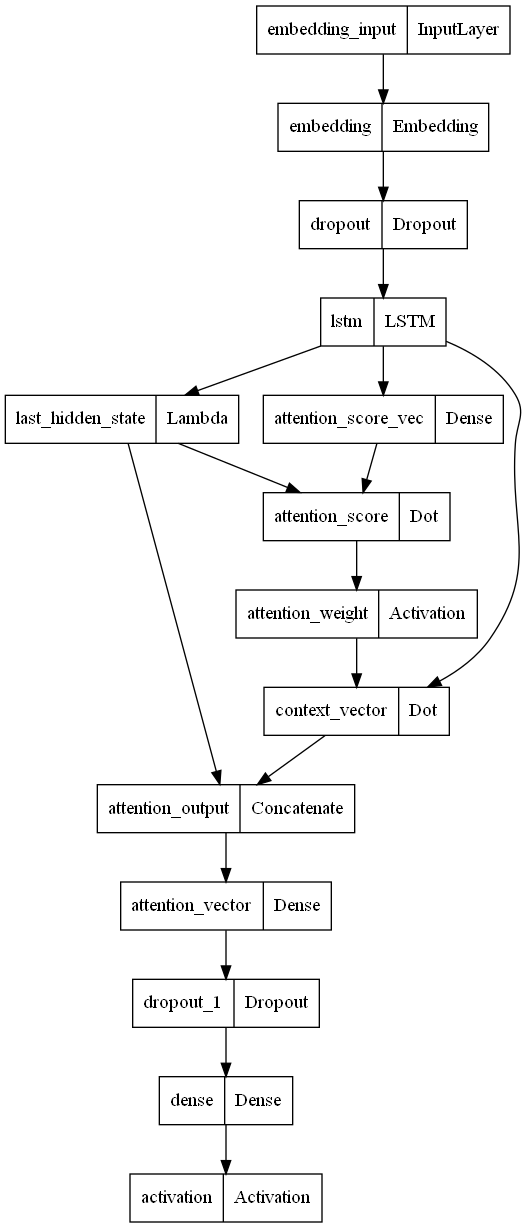

In [1]:
#!pip install attention
#!pip install pydot
#!pip install graphviz

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

plot_model(model)

In [2]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
625/625 [==============================] - 38s 53ms/step - loss: 0.3754 - accuracy: 0.8301 - val_loss: 0.2827 - val_accuracy: 0.8844
Epoch 2/100
625/625 [==============================] - 32s 52ms/step - loss: 0.2253 - accuracy: 0.9112 - val_loss: 0.2606 - val_accuracy: 0.8930
Epoch 3/100
625/625 [==============================] - 32s 51ms/step - loss: 0.1657 - accuracy: 0.9348 - val_loss: 0.3268 - val_accuracy: 0.8773
Epoch 4/100
625/625 [==============================] - 32s 51ms/step - loss: 0.1213 - accuracy: 0.9528 - val_loss: 0.3570 - val_accuracy: 0.8778
Epoch 5/100
782/782 [==============================] - 13s 16ms/step - loss: 0.4031 - accuracy: 0.8808

 Test Accuracy: 0.8808


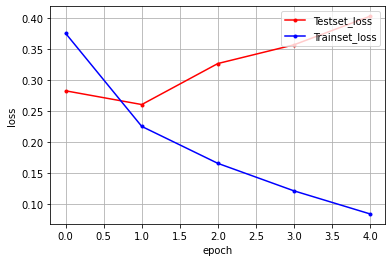

In [3]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()